# Session 1: part 2
We will apply the knowledge from previous session to analyze a dataset of houses. This dataset is obtained from the Coursera machine learning foundations course (https://www.coursera.org/learn/ml-foundations/supplement/RP8te/predicting-house-prices-assignment), a highly recommended course. It can be downloaded at https://d396qusza40orc.cloudfront.net/phoenixassets/home_data.csv.

__Exercises__: Just follow along this notebook and fill in the elements with '_'. You are also invited to play with the code, discuss with your colleagues and ask questions to the instructors.

First we load the data and import the libraries we will use.

In [15]:
# ipython enable print each statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load home_data.csv into a dataframe
homes = pd.read_csv('home_data.csv')
homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can see that we have 21 features and 21613 samples.

In [11]:
homes.shape

(21613, 21)

# Data analysis

Now that we have the data loaded, we can start exploring it. 

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Price')

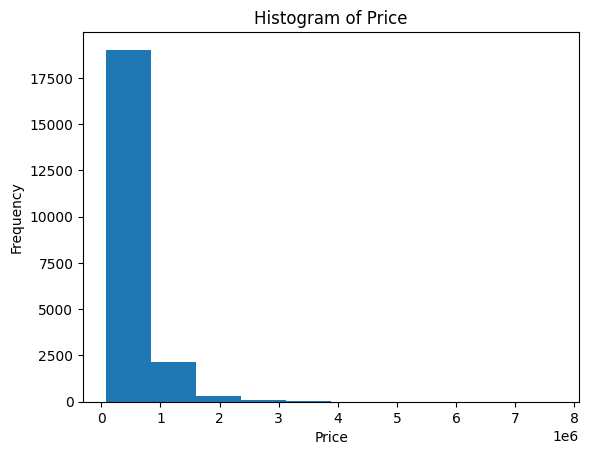

In [16]:
# Plot a histogram of price
plt.hist(homes['price']) # TODO solution remove
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

Text(0.5, 0, 'Living Area (sqft)')

Text(0, 0.5, 'Price ($)')

Text(0.5, 1.0, 'Price vs Living Area')

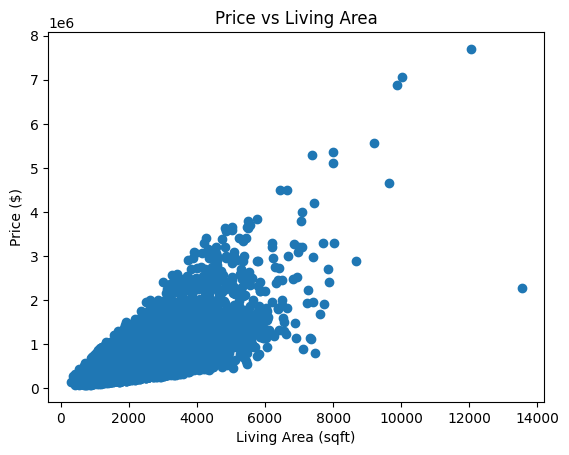

In [17]:
import matplotlib.pyplot as plt

# Plot square feet vs price of house
plt.scatter(homes['sqft_living'], homes['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Price vs Living Area')
#plt.scatter(_, homes['price'])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Price ($)')

Text(0.5, 1.0, 'Price vs Feature')

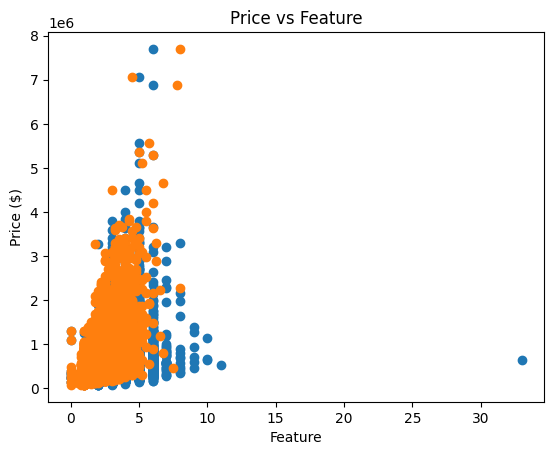

In [18]:
# Also plot bedrooms and bathrooms vs price
# TODO Find out how to add a legend
plt.scatter(homes['bedrooms'], homes['price'], label='Bedrooms')
plt.scatter(homes['bathrooms'], homes['price'], label='Bathrooms')
plt.xlabel('Feature')
plt.ylabel('Price ($)')
plt.title('Price vs Feature')
#plt.legend()

#plt.scatter(_, homes['price'])
#plt.scatter(_, homes['price'])

In [36]:
# Exercise. generate summaries of the data for all columns except id 
# is there a pandas API that seems helpful? 
# Check the docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

#homes.describe()

In [32]:
# Exercise. Find the most expensive house and the biggest house

# find the most expensive house
#homes[homes['price'] == homes['price'].max()]

# find the biggest house
#homes[homes['sqft_living'] == homes['sqft_living'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,20140505T000000,2280000,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [20]:
# Exercise. Find the average price, the median price, and the average price of a 3 bedroom house

# average home price
homes['price'].mean()
# median home price
homes['price'].median()
#homes['price']._()
# average home price for houses with 3 bedrooms
homes[homes['bedrooms'] == 3]['price'].mean()

540088.1419053348

450000.0

466232.07949918567

# Linear regression

We will now use a linear regression model to predict the housing prices. As in the typical machine learning workflow, we perform the following steps:
1. Split the data into training and test sets
2. Train the model on the training set
3. Evaluate the model on the test set

We will use the scikit-learn library to perform the linear regression.

In [25]:
from sklearn.model_selection import train_test_split

# set seed for reproducibility
np.random.seed(0)
train_homes, test_homes = train_test_split(homes, test_size=0.2)

In [26]:
# we can check the size of the train and test sets
train_homes.shape
test_homes.shape

(17290, 21)

(4323, 21)

In [27]:
# build linear regression model from sqft_living to price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit the model
sqft_model = LinearRegression()
sqft_model.fit(train_homes[['sqft_living']], train_homes['price'])

# make predictions on the test data
pred_homes = sqft_model.predict(test_homes[['sqft_living']])
pred_homes.shape

LinearRegression()

(4323,)

In [28]:
# Now we can analyze the model performance.

# The coefficients
print("Coefficients:", sqft_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" %  np.sqrt(mean_squared_error(test_homes['price'], pred_homes)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], pred_homes))

Coefficients: [283.96855737]
Mean squared error: 248879.06
Coefficient of determination: 0.48


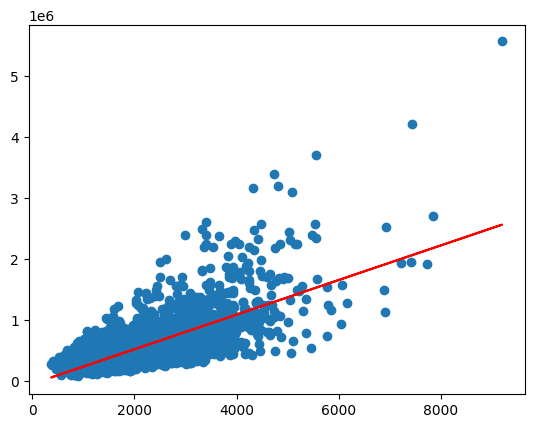

In [29]:
# plot the predictions and the original data
plt.scatter(test_homes['sqft_living'], test_homes['price'])
plt.plot(test_homes['sqft_living'], pred_homes, color='red')

We achieve a relatively satisfactory result. Let's see how we can improve it. Perhaps we can use more features? 

In [30]:
# perform the linear regression with more features 
# ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
# and compare the results

# fit the model
multi_model = LinearRegression()
multi_model.fit(
    train_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'long', 'zipcode']], 
    train_homes['price'])

# make predictions on the test data
#multi_pred_homes = multi_model.predict(
#    test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']])
multi_pred_homes = multi_model.predict(
    test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'long', 'zipcode']])

# The coefficients
print("Coefficients:", multi_model.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % 
      np.sqrt(mean_squared_error(test_homes['price'], multi_pred_homes)))
#print("Root mean squared error: %.2f" % _)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_homes['price'], multi_pred_homes))
#print("Coefficient of determination: %.2f" % _)

print("Mean squared error: %.2f" % mean_squared_error(test_homes['price'], multi_pred_homes))

LinearRegression()

Coefficients: [-5.83133901e+04  1.29612134e+04  3.26055099e+02 -8.43692974e-02
  3.50179065e+03 -4.18683001e+05  3.68630484e+01]
Root mean squared error: 240518.69
Coefficient of determination: 0.51
Mean squared error: 57849242326.17


__Discuss__: 
1. What is the difference between the training and test sets? Why do we need both?
2. Why is the `multi_model` performing better than the original `sqft_model`?


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

Accuracy: 0.83


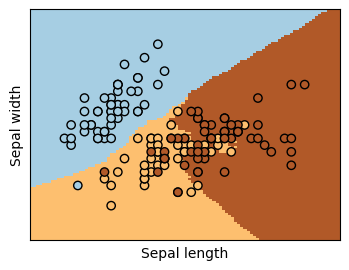

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

Accuracy: 0.81


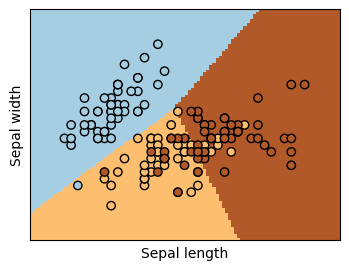

In [585]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_decision_boundary(clf, X):
    _, ax = plt.subplots(figsize=(4, 3))
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.Paired,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        xlabel="Sepal length",
        ylabel="Sepal width",
        eps=0.5,
    )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.show()

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
pipes = [
    Pipeline(steps=[("scaler", StandardScaler()), 
                    ("knn", KNeighborsClassifier(n_neighbors=11))]),
    Pipeline(steps=[("scaler", StandardScaler()), 
                    ("logreg", LogisticRegression())])
]

for clf in pipes:
    clf.fit(X, Y)
    # compute the accuracy on the training set
    print(f"Accuracy: {clf.score(X, Y):.2f}")
    plot_decision_boundary(clf, X)

#clf = Pipeline(
#    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
#)

#clf.fit(X, Y)

# plot the decision boundary
#plot_decision_boundary(clf, X)

# Linear Regression with Pytorch

THIS IS PRETTY BAD

In [498]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(7, 21),
      nn.ReLU(),
      nn.Linear(21, 14),
      nn.ReLU(),
      nn.Linear(14, 7),
      nn.ReLU(),
      nn.Linear(7, 1)
    )
    self.layers = nn.Linear(7, 1)

  def forward(self, x):
    out = self.layers(x)
    return out
  
# set seed for reproducibility
torch.manual_seed(0)

# convert the data to tensors
# TODO
scaler = StandardScaler()

x_train = torch.tensor(train_homes[['sqft_living']].values, dtype=torch.float32)

y_train = torch.tensor(train_homes['price'].values, dtype=torch.float32).view(-1, 1)
x_test = torch.tensor(test_homes[['sqft_living']].values, dtype=torch.float32)
y_test = torch.tensor(test_homes['price'].values, dtype=torch.float32).view(-1, 1)

x_train = torch.tensor(
   train_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'long', 'zipcode']].values,
     dtype=torch.float32)

y_train = torch.tensor(train_homes['price'].values, dtype=torch.float32).view(-1, 1)

x_test = torch.tensor(
     test_homes[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'long', 'zipcode']].values,
     dtype=torch.float32)
y_test = torch.tensor(test_homes['price'].values, dtype=torch.float32).view(-1, 1)


[4.32123216e+11            inf            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan         

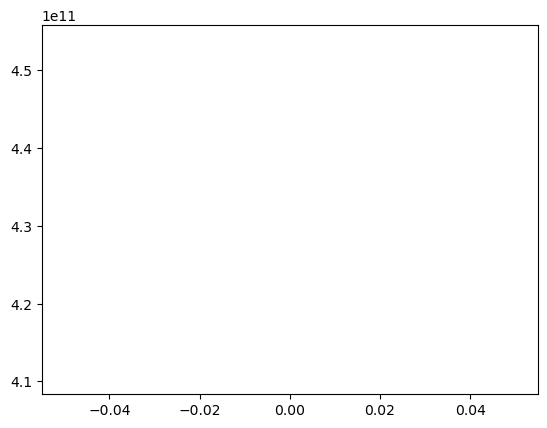

In [500]:
# Run training loop

lr = 0.0001 # Learning rate
n_epochs = 300  # Number of epochs

# Model instantiation
LR_model = MyNet()
optimizer = optim.SGD(LR_model.parameters(), lr=lr)
criterion = nn.MSELoss()

losses = np.zeros(n_epochs)  # Loss records
for i in range(n_epochs):  # Training loop
  optimizer.zero_grad()
  y_pred = LR_model(x_train)
  loss = criterion(y_train, y_pred)
  loss.backward()
  optimizer.step()
  losses[i] = loss.item()
  #print(losses)

# plot the loss
plt.plot(losses)

print(losses)

In [487]:
# predict on the test data
y_pred = LR_model(x_test)
y_pred.shape

# evaluate the RMSE of the model 
#mean_squared_error(y_test.detach().numpy(), y_pred.detach().numpy())

r2_score(y_test.detach().numpy(), y_pred.detach().numpy())

torch.Size([4323, 1])

-0.0015879872438002707

MSE: 0.50
RMSE: 0.70


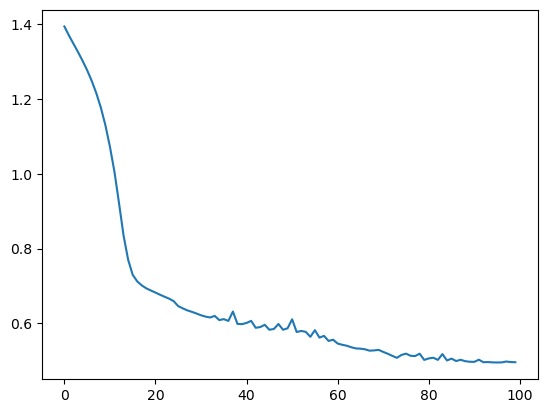

In [504]:
# ipython enable print each statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 
# Read data
data = fetch_california_housing()
X, y = data.data, data.target
 
# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)
 
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [ ]:
https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial3.html#section-5-1-linear-regression

Now we will use the same dataset to perform linear regression using PyTorch. We will use the same features as before, but we will use a different model. Instead of using a linear model, we will use a neural network with no hidden . The model will have the following structure:

We are using the MSE loss as discussed in part 1. 

Instead of computing the optimal function directly iwth its clsoed form, we are applying a search algorithm called Gradient Descent (GD). GD is an iterative algorithm that starts with an initial guess for the parameters and then updates them iteratively until convergence. 

The key intuition of GD to minimize a function is that the gradient of a function points to the direction of the steepest ascent. Therefore, to minimize a function, we need to move in the opposite direction of the gradient.

You can read more about the math https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent



In [ ]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Read data
data = fetch_california_housing()
# Standardize data with StandardScaler()
scaler = StandardScaler()
#data.data = scaler.fit_transform(data.data)
X = scaler.fit_transform(data.data)
y = data.target

#X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Linear(8, 1) # bias = False)
#model = nn.Sequential(
#    nn.Linear(8, 24),
#    nn.ReLU(),
#    nn.Linear(24, 12),
#    nn.ReLU(),
#    nn.Linear(12, 6),
#    nn.ReLU(),
#    nn.Linear(6, 1)
#)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error => talk about first part
optimizer = optim.SGD(model.parameters(), lr=0.01) # optimization 

#optim.Adam(model.parameters(), lr=100)

n_epochs = 1000  # number of epochs to run
batch_size = 100000  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))

plt.plot(history)
plt.show()

# Additional reading & exercises

https://compneuro.neuromatch.io/tutorials/W1D5_DeepLearning/student/W1D5_Tutorial1.html
    

https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial3.html#video-9-linear-regression 
    See Bonus section. 

# Using GPU

If you have a GPU, you can use it to speed up the training. To do so, you need to move the model and the data to the GPU. You can do so by calling the `to` method of the model and the data.

=> GPU is key in deep learning, we will ahve a exmaple of the difference of perf. 
=> training with cpu can be pretty slow, we'll see the difference in the following. 

play around w/ the number of epochs, batch size, number of layers, etc. 

In [ ]:
# load mnist data, create train and test sets and train a neural network to classify the images

import torch
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Download and load the training data

trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)

# Download and load the test data

testset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)   

testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2
)

# train a CNN on the MNIST dataset


# Using ChatGPT

Try to ask ChatGPT to generate code for MNIST classification. 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Initialize the model, loss function, and optimizer
net = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(5):  # adjust as needed
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.630
[1,  4000] loss: 0.159
[1,  6000] loss: 0.111


KeyboardInterrupt: 

In [ ]:
https://www.kaggle.com/code/eduardoconto/mnist-introduction-to-computervision-with-pytorch/edit